# Assignment #1
## Base Feed Forward Neural Networks
Author: **Jakub Biegas**
Student index: **260344**

## Import MNIST dataset

In [1]:
from assignment_1.dataset import MnistDataset

mnist_dataset = MnistDataset(path="data/processed/mnist/train.csv", test_size=0.2)
mnist_dataset.X_train.shape, mnist_dataset.y_train.shape

((33600, 784), (33600,))

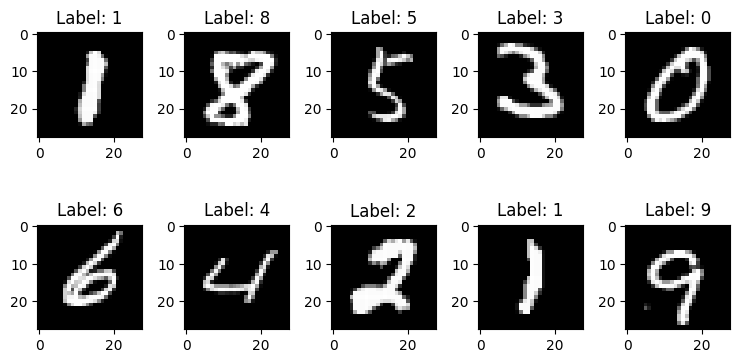

In [2]:
import matplotlib.pyplot as plt

num_row = 2
num_col = 5

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5 * num_col, 2 * num_row))
for i in range(num_row * num_col):
    ax = axes[i // num_col, i % num_col]
    ax.imshow(mnist_dataset.X_train[i].reshape(28, 28), cmap="gray")
    ax.set_title("Label: {}".format(mnist_dataset.y_train[i]))
plt.tight_layout()
plt.show()

In [3]:
from assignment_1.models import NeuralNetwork
from assignment_1.utils.activation_functions import ReLUActivation, SoftmaxActivation
from assignment_1.utils.weights import XavierWeightInitializer, HeWeightInitializer

mnist_classification_nn = NeuralNetwork(
    input_dim=784,
    hidden_dim=32,
    output_dim=10,
    num_of_hidden_layers=2,
    weight_initializer=HeWeightInitializer(),
    activation_function=ReLUActivation(),
    output_activation_function=SoftmaxActivation(),
)

In [4]:
from assignment_1.utils.optimizers import MiniBatchOptimizer
from assignment_1.utils.loss_functions import CategoricalCrossEntropyLoss

mnist_optimizer = MiniBatchOptimizer(
    mnist_classification_nn,
    loss_function=CategoricalCrossEntropyLoss(),
    batch_size=64,
    epochs=10,
    learning_rate=0.1,
    classification=True,
)
mnist_optimizer.optimize(mnist_dataset.X_train, mnist_dataset.y_train)

Started optimization of NeuralNetwork, classification=True
Epoch 1  --  accuracy 0.8750000 - loss 0.3295036
Epoch 2  --  accuracy 0.9062500 - loss 0.3092300
Epoch 3  --  accuracy 0.9218750 - loss 0.2980826
Epoch 4  --  accuracy 0.9218750 - loss 0.3015578
Epoch 5  --  accuracy 0.9531250 - loss 0.2969665
Epoch 6  --  accuracy 0.9687500 - loss 0.2559153
Epoch 7  --  accuracy 0.9531250 - loss 0.2330571
Epoch 8  --  accuracy 0.9375000 - loss 0.2279053
Epoch 9  --  accuracy 0.9375000 - loss 0.2181611
Epoch 10  --  accuracy 0.9375000 - loss 0.2111032


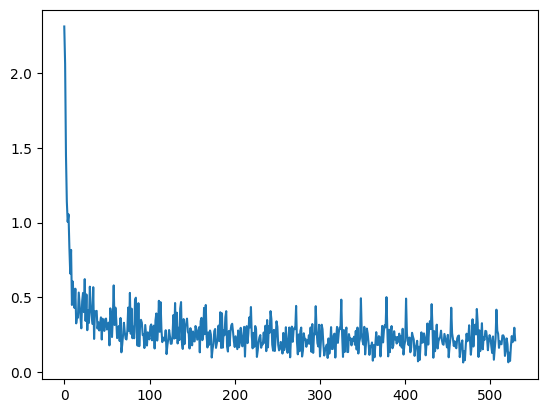

In [5]:
import matplotlib.pyplot as plt

plt.plot(mnist_optimizer.all_loss_values)
plt.show()

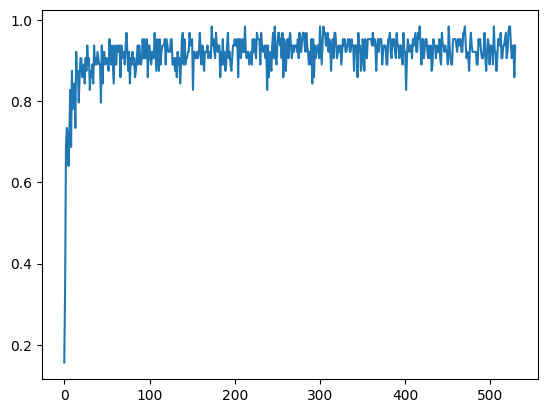

In [6]:
plt.plot(mnist_optimizer.all_accuracy_values)
plt.show()

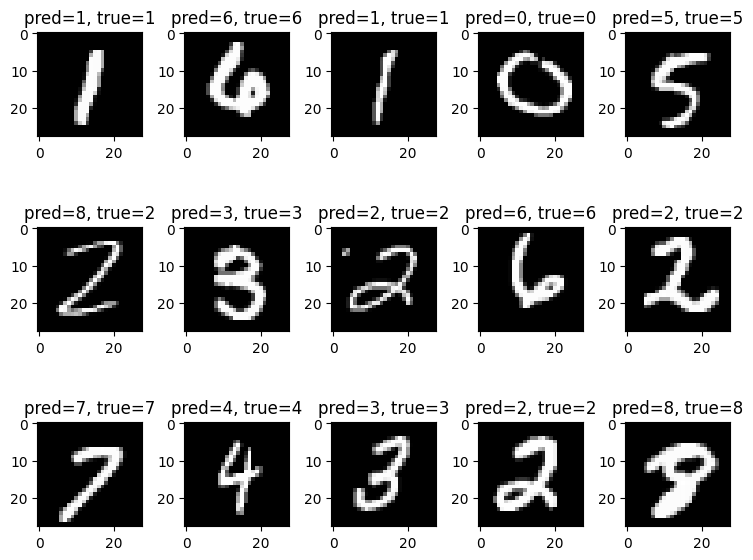

In [7]:
import numpy as np

num_row = 3
num_col = 5

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5 * num_col, 2 * num_row))
for i in range(num_row * num_col):
    ax = axes[i // num_col, i % num_col]
    random_index = np.random.randint(0, mnist_dataset.X_test.shape[0])
    ax.imshow(mnist_dataset.X_test[random_index].reshape(28, 28), cmap="gray")
    prediction = np.argmax(
        mnist_classification_nn.forward(mnist_dataset.X_test[random_index]), axis=1
    )
    correct_label = mnist_dataset.y_test[random_index]
    ax.set_title("pred={}, true={}".format(prediction[0], correct_label))
plt.tight_layout()
plt.show()

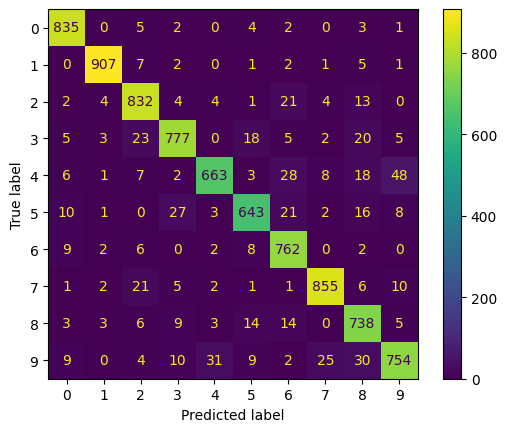

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_test_pred = np.argmax(mnist_classification_nn.forward(mnist_dataset.X_test), axis=1)
cm = confusion_matrix(mnist_dataset.y_test, y_test_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
cm_display.plot()

## Forest Fires Dataset

In [9]:
from assignment_1.dataset import ForestFiresDataset
from assignment_1.models import NeuralNetwork
from assignment_1.utils.activation_functions import (
    SigmoidActivation,
    LinearActivation,
    ReLUActivation,
)

forest_fires_dataset = ForestFiresDataset(
    path="data/processed/forest+fires/forestfires.csv", test_size=0.1
)

forest_fires_regression_nn = NeuralNetwork(
    input_dim=12,
    hidden_dim=256,
    output_dim=1,
    num_of_hidden_layers=2,
    weight_initializer=XavierWeightInitializer(),
    activation_function=SigmoidActivation(),
    output_activation_function=ReLUActivation(),
)

print(forest_fires_dataset.X_train.shape, forest_fires_dataset.y_train.shape)

(465, 12) (465, 1)


In [10]:
from assignment_1.utils.loss_functions import MeanSquaredError, MeanAbsoluteError
from assignment_1.utils.optimizers import MiniBatchOptimizer

forest_fires_optimizer = MiniBatchOptimizer(
    forest_fires_regression_nn,
    loss_function=MeanSquaredError(),
    batch_size=128,
    epochs=1000,
    learning_rate=0.00001,
)
forest_fires_optimizer.optimize(
    forest_fires_dataset.X_train, forest_fires_dataset.y_train.reshape(-1, 1)
)

Started optimization of NeuralNetwork, classification=False
Epoch 1  --  accuracy 0.6875000 - loss 3.3508593
Epoch 2  --  accuracy 0.6875000 - loss 3.3507345
Epoch 3  --  accuracy 0.6875000 - loss 3.3506099
Epoch 4  --  accuracy 0.6875000 - loss 3.3504854
Epoch 5  --  accuracy 0.6875000 - loss 3.3503610
Epoch 6  --  accuracy 0.6875000 - loss 3.3502368
Epoch 7  --  accuracy 0.6875000 - loss 3.3501127
Epoch 8  --  accuracy 0.6875000 - loss 3.3499887
Epoch 9  --  accuracy 0.6875000 - loss 3.3498648
Epoch 10  --  accuracy 0.6875000 - loss 3.3497411
Epoch 11  --  accuracy 0.6875000 - loss 3.3496175
Epoch 12  --  accuracy 0.6875000 - loss 3.3494940
Epoch 13  --  accuracy 0.6875000 - loss 3.3493706
Epoch 14  --  accuracy 0.6875000 - loss 3.3492474
Epoch 15  --  accuracy 0.6875000 - loss 3.3491243
Epoch 16  --  accuracy 0.6875000 - loss 3.3490013
Epoch 17  --  accuracy 0.6875000 - loss 3.3488784
Epoch 18  --  accuracy 0.6875000 - loss 3.3487557
Epoch 19  --  accuracy 0.6875000 - loss 3.3486331

C:\Users\kbbgs\OneDrive\Pulpit\neural-networks-labs\assignment_1\utils\activation_functions.py:36: RuntimeWarning: overflow encountered in exp
  self.outputs = 1 / (1 + np.exp(-inputs))


Epoch 28  --  accuracy 0.6875000 - loss 3.3474989
Epoch 29  --  accuracy 0.6875000 - loss 3.3473715
Epoch 30  --  accuracy 0.6875000 - loss 3.3472380
Epoch 31  --  accuracy 0.6875000 - loss 3.3471046
Epoch 32  --  accuracy 0.6875000 - loss 3.3469714
Epoch 33  --  accuracy 0.6875000 - loss 3.3468383
Epoch 34  --  accuracy 0.6875000 - loss 3.3467054
Epoch 35  --  accuracy 0.6875000 - loss 3.3465727
Epoch 36  --  accuracy 0.6875000 - loss 3.3464400
Epoch 37  --  accuracy 0.6875000 - loss 3.3463076
Epoch 38  --  accuracy 0.6875000 - loss 3.3461752
Epoch 39  --  accuracy 0.6875000 - loss 3.3460430
Epoch 40  --  accuracy 0.6875000 - loss 3.3459110
Epoch 41  --  accuracy 0.6875000 - loss 3.3457725
Epoch 42  --  accuracy 0.6875000 - loss 3.3456342
Epoch 43  --  accuracy 0.6875000 - loss 3.3454960
Epoch 44  --  accuracy 0.6875000 - loss 3.3453580
Epoch 45  --  accuracy 0.6875000 - loss 3.3452202
Epoch 46  --  accuracy 0.6875000 - loss 3.3450825
Epoch 47  --  accuracy 0.6875000 - loss 3.3449450


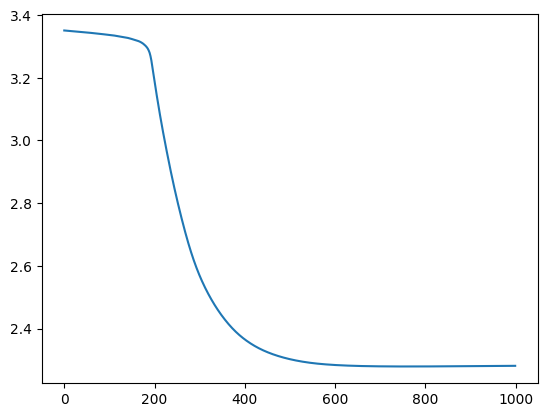

In [11]:
import matplotlib.pyplot as plt

plt.plot(forest_fires_optimizer.all_loss_values)
plt.show()

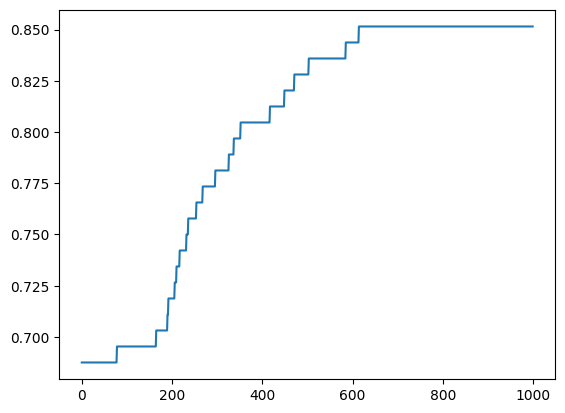

In [12]:
plt.plot(forest_fires_optimizer.all_accuracy_values)
plt.show()

## Experiments on MNIST dataset

### Experiments with network dimensionality

In [13]:
mnist_classification_nn_32 = NeuralNetwork(
    input_dim=784,
    hidden_dim=32,
    output_dim=10,
    num_of_hidden_layers=2,
    weight_initializer=HeWeightInitializer(),
    activation_function=ReLUActivation(),
    output_activation_function=SoftmaxActivation(),
)

mnist_classification_nn_64 = NeuralNetwork(
    input_dim=784,
    hidden_dim=64,
    output_dim=10,
    num_of_hidden_layers=2,
    weight_initializer=HeWeightInitializer(),
    activation_function=ReLUActivation(),
    output_activation_function=SoftmaxActivation(),
)

mnist_classification_nn_256 = NeuralNetwork(
    input_dim=784,
    hidden_dim=256,
    output_dim=10,
    num_of_hidden_layers=2,
    weight_initializer=HeWeightInitializer(),
    activation_function=ReLUActivation(),
    output_activation_function=SoftmaxActivation(),
)

In [14]:
epochs = 10

mnist_optimizer_32 = MiniBatchOptimizer(
    mnist_classification_nn_32,
    loss_function=CategoricalCrossEntropyLoss(),
    batch_size=64,
    epochs=epochs,
    learning_rate=0.1,
    classification=True,
)
mnist_optimizer_32.optimize(mnist_dataset.X_train, mnist_dataset.y_train)

mnist_optimizer_64 = MiniBatchOptimizer(
    mnist_classification_nn_64,
    loss_function=CategoricalCrossEntropyLoss(),
    batch_size=64,
    epochs=epochs,
    learning_rate=0.1,
    classification=True,
)
mnist_optimizer_64.optimize(mnist_dataset.X_train, mnist_dataset.y_train)

mnist_optimizer_256 = MiniBatchOptimizer(
    mnist_classification_nn_256,
    loss_function=CategoricalCrossEntropyLoss(),
    batch_size=64,
    epochs=epochs,
    learning_rate=0.1,
    classification=True,
)
mnist_optimizer_256.optimize(mnist_dataset.X_train, mnist_dataset.y_train)

Started optimization of NeuralNetwork, classification=True
Epoch 1  --  accuracy 0.8593750 - loss 0.3437190
Epoch 2  --  accuracy 0.9062500 - loss 0.2945148
Epoch 3  --  accuracy 0.9062500 - loss 0.2647581
Epoch 4  --  accuracy 0.9062500 - loss 0.2510454
Epoch 5  --  accuracy 0.9218750 - loss 0.2400269
Epoch 6  --  accuracy 0.9375000 - loss 0.2049507
Epoch 7  --  accuracy 0.9375000 - loss 0.1851889
Epoch 8  --  accuracy 0.9375000 - loss 0.1651117
Epoch 9  --  accuracy 0.9687500 - loss 0.1356051
Epoch 10  --  accuracy 0.9687500 - loss 0.1223377
Started optimization of NeuralNetwork, classification=True
Epoch 1  --  accuracy 0.8593750 - loss 0.3871961
Epoch 2  --  accuracy 0.8750000 - loss 0.3234665
Epoch 3  --  accuracy 0.8906250 - loss 0.3086538
Epoch 4  --  accuracy 0.9062500 - loss 0.2841454
Epoch 5  --  accuracy 0.9062500 - loss 0.2207585
Epoch 6  --  accuracy 0.9218750 - loss 0.1936654
Epoch 7  --  accuracy 0.9843750 - loss 0.1552615
Epoch 8  --  accuracy 0.9687500 - loss 0.1171608

In [15]:
epochs = range(1, len(mnist_optimizer_256.all_loss_values) + 1)

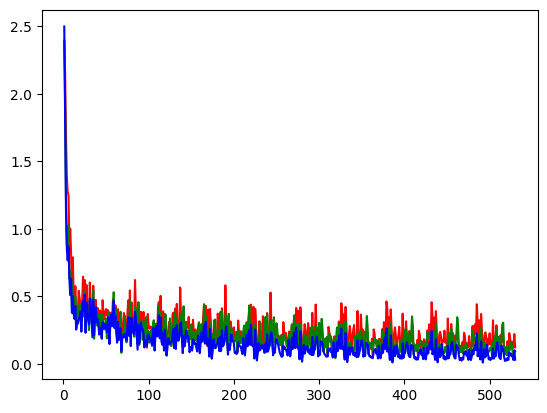

In [16]:
plt.plot(epochs, mnist_optimizer_32.all_loss_values, "r")
plt.plot(epochs, mnist_optimizer_64.all_loss_values, "g")
plt.plot(epochs, mnist_optimizer_256.all_loss_values, "b")
plt.show()

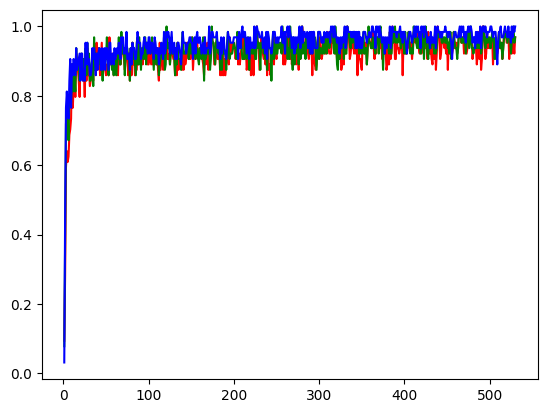

In [17]:
plt.plot(epochs, mnist_optimizer_32.all_accuracy_values, "r")
plt.plot(epochs, mnist_optimizer_64.all_accuracy_values, "g")
plt.plot(epochs, mnist_optimizer_256.all_accuracy_values, "b")
plt.show()

### Experiments with hyperparameters

In [18]:
mnist_classification_nn_32 = NeuralNetwork(
    input_dim=784,
    hidden_dim=32,
    output_dim=10,
    num_of_hidden_layers=2,
    weight_initializer=HeWeightInitializer(),
    activation_function=ReLUActivation(),
    output_activation_function=SoftmaxActivation(),
)

mnist_optimizer_10_01 = MiniBatchOptimizer(
    mnist_classification_nn_32,
    loss_function=CategoricalCrossEntropyLoss(),
    batch_size=64,
    epochs=10,
    learning_rate=0.1,
    classification=True,
)
mnist_optimizer_10_01.optimize(mnist_dataset.X_train, mnist_dataset.y_train)

mnist_classification_nn_32 = NeuralNetwork(
    input_dim=784,
    hidden_dim=32,
    output_dim=10,
    num_of_hidden_layers=2,
    weight_initializer=HeWeightInitializer(),
    activation_function=ReLUActivation(),
    output_activation_function=SoftmaxActivation(),
)

mnist_optimizer_20_01 = MiniBatchOptimizer(
    mnist_classification_nn_32,
    loss_function=CategoricalCrossEntropyLoss(),
    batch_size=64,
    epochs=20,
    learning_rate=0.1,
    classification=True,
)
mnist_optimizer_20_01.optimize(mnist_dataset.X_train, mnist_dataset.y_train)


mnist_classification_nn_32 = NeuralNetwork(
    input_dim=784,
    hidden_dim=32,
    output_dim=10,
    num_of_hidden_layers=2,
    weight_initializer=HeWeightInitializer(),
    activation_function=ReLUActivation(),
    output_activation_function=SoftmaxActivation(),
)

mnist_optimizer_30_01 = MiniBatchOptimizer(
    mnist_classification_nn_32,
    loss_function=CategoricalCrossEntropyLoss(),
    batch_size=64,
    epochs=30,
    learning_rate=0.1,
    classification=True,
)
mnist_optimizer_30_01.optimize(mnist_dataset.X_train, mnist_dataset.y_train)

mnist_classification_nn_32 = NeuralNetwork(
    input_dim=784,
    hidden_dim=32,
    output_dim=10,
    num_of_hidden_layers=2,
    weight_initializer=HeWeightInitializer(),
    activation_function=ReLUActivation(),
    output_activation_function=SoftmaxActivation(),
)

mnist_optimizer_30_001 = MiniBatchOptimizer(
    mnist_classification_nn_32,
    loss_function=CategoricalCrossEntropyLoss(),
    batch_size=64,
    epochs=30,
    learning_rate=0.001,
    classification=True,
)
mnist_optimizer_30_001.optimize(mnist_dataset.X_train, mnist_dataset.y_train)

mnist_classification_nn_32 = NeuralNetwork(
    input_dim=784,
    hidden_dim=32,
    output_dim=10,
    num_of_hidden_layers=2,
    weight_initializer=HeWeightInitializer(),
    activation_function=ReLUActivation(),
    output_activation_function=SoftmaxActivation(),
)

mnist_optimizer_30_0001 = MiniBatchOptimizer(
    mnist_classification_nn_32,
    loss_function=CategoricalCrossEntropyLoss(),
    batch_size=64,
    epochs=30,
    learning_rate=0.0001,
    classification=True,
)
mnist_optimizer_30_0001.optimize(mnist_dataset.X_train, mnist_dataset.y_train)

Started optimization of NeuralNetwork, classification=True
Epoch 1  --  accuracy 0.8750000 - loss 0.4118505
Epoch 2  --  accuracy 0.9218750 - loss 0.3104361
Epoch 3  --  accuracy 0.9062500 - loss 0.2664393
Epoch 4  --  accuracy 0.9375000 - loss 0.2632702
Epoch 5  --  accuracy 0.9375000 - loss 0.2404512
Epoch 6  --  accuracy 0.9218750 - loss 0.2096954
Epoch 7  --  accuracy 0.9218750 - loss 0.1925387
Epoch 8  --  accuracy 0.9375000 - loss 0.1641573
Epoch 9  --  accuracy 0.9687500 - loss 0.1273385
Epoch 10  --  accuracy 0.9687500 - loss 0.1198826
Started optimization of NeuralNetwork, classification=True
Epoch 1  --  accuracy 0.9062500 - loss 0.3784185
Epoch 2  --  accuracy 0.8281250 - loss 0.3405472
Epoch 3  --  accuracy 0.8281250 - loss 0.4154182
Epoch 4  --  accuracy 0.8593750 - loss 0.3881383
Epoch 5  --  accuracy 0.8437500 - loss 0.3519380
Epoch 6  --  accuracy 0.8750000 - loss 0.3207308
Epoch 7  --  accuracy 0.8437500 - loss 0.3207316
Epoch 8  --  accuracy 0.8593750 - loss 0.3099524

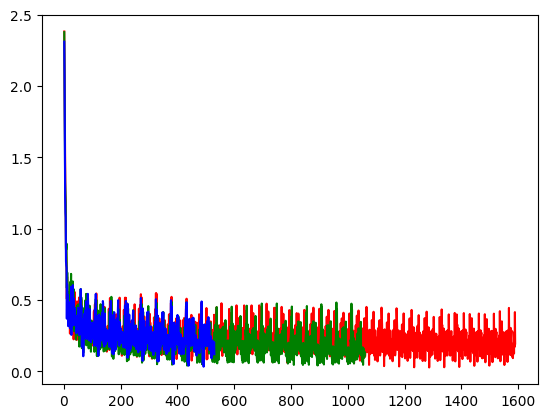

In [19]:
plt.plot(
    range(1, len(mnist_optimizer_30_01.all_loss_values) + 1),
    mnist_optimizer_30_01.all_loss_values,
    "r",
)
plt.plot(
    range(1, len(mnist_optimizer_20_01.all_loss_values) + 1),
    mnist_optimizer_20_01.all_loss_values,
    "g",
)
plt.plot(
    range(1, len(mnist_optimizer_10_01.all_loss_values) + 1),
    mnist_optimizer_10_01.all_loss_values,
    "b",
)

plt.show()

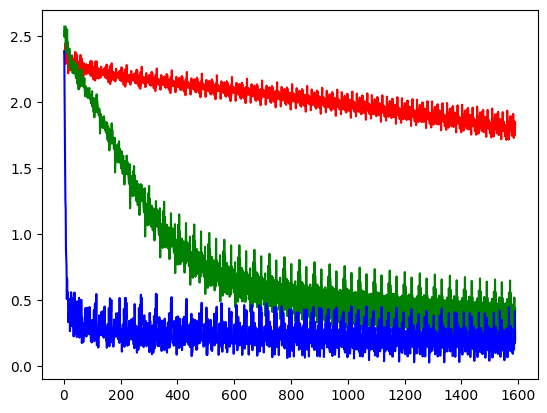

In [20]:
plt.plot(
    range(1, len(mnist_optimizer_30_0001.all_loss_values) + 1),
    mnist_optimizer_30_0001.all_loss_values,
    "r",
)
plt.plot(
    range(1, len(mnist_optimizer_30_001.all_loss_values) + 1),
    mnist_optimizer_30_001.all_loss_values,
    "g",
)
plt.plot(
    range(1, len(mnist_optimizer_30_01.all_loss_values) + 1),
    mnist_optimizer_30_01.all_loss_values,
    "b",
)

plt.show()

### Impact of weight initialization strategies on model performance

In [21]:
from assignment_1.utils.weights import (
    RandomWeightInitializer,
    XavierWeightInitializer,
    HeWeightInitializer,
)


mnist_classification_nn_32_random_weights = NeuralNetwork(
    input_dim=784,
    hidden_dim=32,
    output_dim=10,
    num_of_hidden_layers=2,
    weight_initializer=RandomWeightInitializer(),
    activation_function=ReLUActivation(),
    output_activation_function=SoftmaxActivation(),
)

mnist_classification_nn_32_xavier_weights = NeuralNetwork(
    input_dim=784,
    hidden_dim=32,
    output_dim=10,
    num_of_hidden_layers=2,
    weight_initializer=XavierWeightInitializer(),
    activation_function=ReLUActivation(),
    output_activation_function=SoftmaxActivation(),
)

mnist_classification_nn_32_he_weights = NeuralNetwork(
    input_dim=784,
    hidden_dim=32,
    output_dim=10,
    num_of_hidden_layers=2,
    weight_initializer=HeWeightInitializer(),
    activation_function=ReLUActivation(),
    output_activation_function=SoftmaxActivation(),
)

In [22]:
epochs = 10

mnist_optimizer_32_random_weights = MiniBatchOptimizer(
    mnist_classification_nn_32_random_weights,
    loss_function=CategoricalCrossEntropyLoss(),
    batch_size=64,
    epochs=epochs,
    learning_rate=0.1,
    classification=True,
)
mnist_optimizer_32_random_weights.optimize(mnist_dataset.X_train, mnist_dataset.y_train)

mnist_optimizer_32_xavier_weights = MiniBatchOptimizer(
    mnist_classification_nn_32_xavier_weights,
    loss_function=CategoricalCrossEntropyLoss(),
    batch_size=64,
    epochs=epochs,
    learning_rate=0.1,
    classification=True,
)
mnist_optimizer_32_xavier_weights.optimize(mnist_dataset.X_train, mnist_dataset.y_train)

mnist_optimizer_32_he_weights = MiniBatchOptimizer(
    mnist_classification_nn_32_he_weights,
    loss_function=CategoricalCrossEntropyLoss(),
    batch_size=64,
    epochs=epochs,
    learning_rate=0.1,
    classification=True,
)
mnist_optimizer_32_he_weights.optimize(mnist_dataset.X_train, mnist_dataset.y_train)

Started optimization of NeuralNetwork, classification=True
Epoch 1  --  accuracy 0.0781250 - loss 2.3057065
Epoch 2  --  accuracy 0.7500000 - loss 0.6975986
Epoch 3  --  accuracy 0.7656250 - loss 0.5865559
Epoch 4  --  accuracy 0.8593750 - loss 0.4170083
Epoch 5  --  accuracy 0.8593750 - loss 0.3884241
Epoch 6  --  accuracy 0.8750000 - loss 0.3796068
Epoch 7  --  accuracy 0.9062500 - loss 0.3466584
Epoch 8  --  accuracy 0.9218750 - loss 0.3172320
Epoch 9  --  accuracy 0.9375000 - loss 0.2924372
Epoch 10  --  accuracy 0.9218750 - loss 0.2596043
Started optimization of NeuralNetwork, classification=True
Epoch 1  --  accuracy 0.8125000 - loss 0.5462769
Epoch 2  --  accuracy 0.8593750 - loss 0.4236290
Epoch 3  --  accuracy 0.9218750 - loss 0.3044325
Epoch 4  --  accuracy 0.9218750 - loss 0.2515196
Epoch 5  --  accuracy 0.9062500 - loss 0.2429233
Epoch 6  --  accuracy 0.9375000 - loss 0.1939433
Epoch 7  --  accuracy 0.9218750 - loss 0.2008543
Epoch 8  --  accuracy 0.9218750 - loss 0.1678222

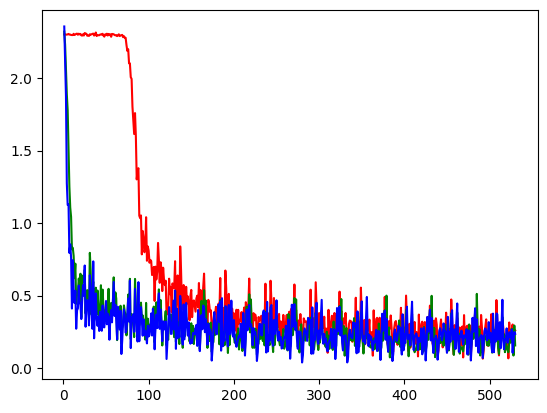

In [23]:
plt.plot(
    range(1, len(mnist_optimizer_32_random_weights.all_loss_values) + 1),
    mnist_optimizer_32_random_weights.all_loss_values,
    "r",
)
plt.plot(
    range(1, len(mnist_optimizer_32_xavier_weights.all_loss_values) + 1),
    mnist_optimizer_32_xavier_weights.all_loss_values,
    "g",
)
plt.plot(
    range(1, len(mnist_optimizer_32_he_weights.all_loss_values) + 1),
    mnist_optimizer_32_he_weights.all_loss_values,
    "b",
)

plt.show()

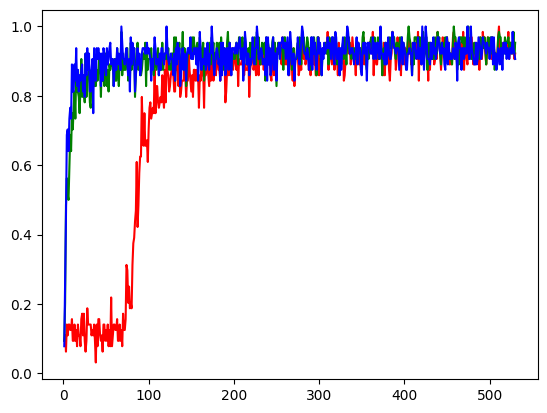

In [24]:
plt.plot(
    range(1, len(mnist_optimizer_32_random_weights.all_accuracy_values) + 1),
    mnist_optimizer_32_random_weights.all_accuracy_values,
    "r",
)
plt.plot(
    range(1, len(mnist_optimizer_32_xavier_weights.all_accuracy_values) + 1),
    mnist_optimizer_32_xavier_weights.all_accuracy_values,
    "g",
)
plt.plot(
    range(1, len(mnist_optimizer_32_he_weights.all_accuracy_values) + 1),
    mnist_optimizer_32_he_weights.all_accuracy_values,
    "b",
)

plt.show()